Much of this code was adapted/used from Anna Jenul's 2022 RENT, available at: [https://doi.org/10.21105/joss.03323].

In [1]:
!pip install git+https://github.com/NMBU-Data-Science/RENT.git

  Cloning https://github.com/NMBU-Data-Science/RENT.git to /tmp/pip-req-build-n9x3c3h5
  Running command git clone --filter=blob:none --quiet https://github.com/NMBU-Data-Science/RENT.git /tmp/pip-req-build-n9x3c3h5
  Resolved https://github.com/NMBU-Data-Science/RENT.git to commit 6323845ea5395a7395ae4de365cd39ec269e7576
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 1.8 MB/s eta 0:00:00
  Created wheel for RENT: filename=RENT-0.0.1-py2.py3-none-any.whl size=23809 sha256=db549648e38e44a4f4d6624b3359c39363d19a06a17fd8dc283ff99ea2cc39e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-8zklq2g1/wheels/9e/4c/99/276d42151ea2d0f9d85f11a3ddab2ee731dc54ecb9557fa737
Successfully built RENT


In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, LeaveOneGroupOut, cross_val_predict
from sklearn.preprocessing import StandardScaler
from RENT import RENT, stability
warnings.filterwarnings("ignore")
import time


In [4]:
import sys
sys.path.append('/content/drive/My Drive/Master Thesis Spring 2024')
from preprocessing import preprocessing_PLS_RENT

In [5]:
X_train, Y_train, X_test, Y_test, df_encoded = preprocessing_PLS_RENT("TINE.Ystekar.Norvegia.v1.csv", train_index=1459)

In [6]:
# Dropping Bs_Batch
X_train_2 = X_train.drop(['Bs_Batch'], axis=1)
X_test_2 = X_test.drop(['Bs_Batch'],axis=1)

In [7]:
# Define the RENT parameters
my_C_params = [0.1,1,10,25,50,100,150,200,250]


my_l1_ratios = [0, 0.1, 0.25, 0.5,0.6,0.65,0.7,0.75, 0.8,0.9, 1]

# Create the RENT model
model = RENT.RENT_Regression(data=X_train_2,
                             target=Y_train,
                             feat_names=X_train_2.columns,
                             C=my_C_params,
                             l1_ratios=my_l1_ratios,
                             poly='OFF', # I get problems when I use On
                             testsize_range=(0.25, 0.6),
                             autoEnetParSel=True,
                             BIC=True,
                             scale = True,
                             K=100,
                             random_state=0,
                             verbose=1)

data dimension: (1459, 83)  data type: <class 'pandas.core.frame.DataFrame'>
target dimension: (1459,)
regularization parameters C: [0.1, 1, 10, 25, 50, 100, 150, 200, 250]
elastic net l1_ratios: [0, 0.1, 0.25, 0.5, 0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 1]
poly: OFF
number of models in ensemble: 100
random state: 0
verbose: 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.8s finished


In [8]:
# Train RENT ensemble and inspect results
model.train()

In [13]:
model.get_BIC_matrix()

0.1              1.0              10.0             25.0   \
0.00  17395473.940366  17394944.628823  17394836.711239  17394823.509051   
0.10  17395497.909836  17394957.155687  17394580.513261  17394641.878114   
0.25  17395497.909836  17395349.837551  17394562.864907  17394544.178231   
0.50  17395497.909836  17395497.909836  17394580.730156  17394540.275882   
0.60  17395497.909836  17395497.909836  17394617.522947  17394534.336099   
0.65  17395497.909836  17395497.909836  17394634.931424  17394535.339689   
0.70  17395497.909836  17395497.909836  17394646.108985  17394544.312479   
0.75  17395497.909836  17395497.909836  17394656.931618  17394539.162095   
0.80  17395497.909836  17395497.909836  17394683.617479  17394539.790239   
0.90  17395497.909836  17395497.909836  17394703.684437  17394532.090362   
1.00  17395497.909836  17395497.909836  17394749.253418  17394516.387975   

                50.0             100.0            150.0            200.0  \
0.00  17394815.969767  17394809.151191  17394805.463893  17394803.043927   
0.10  17394691.626075  17394723.135087  17394717.087139  17394742.383342   
0.25  17394607.781103  17394662.936444  17394653.532428  17394669.715447   
0.50  17394520.154426  17394583.995889  17394616.682839  17394639.486208   
0.60   17394511.28048  17394574.958566  17394599.164525  17394636.098955   
0.65  17394513.877379  17394541.137131  17394593.935443  17394623.200668   
0.70  17394516.687183  17394536.114757  17394574.026615  17394610.275228   
0.75  17394519.712918  17394545.895338  17394576.049564  17394597.224314   
0.80  17394515.668625   17394526.37814  17394570.857087   17394598.77697   
0.90  17394515.409426  17394523.300466  17394567.307202  17394565.400957   
1.00  17394508.653065  17394512.057636  17394534.640675   17394568.42973   

                250.0  
0.00   17394801.30268  
0.10  17394754.065254  
0.25   17394687.25177  
0.50  17394647.320881  
0.60  17394645.437832  
0.65  17394640.185024  
0.70  17394634.657073  
0.75  17394635.962589  
0.80   17394622.77788  
0.90  17394588.814555  
1.00  17394576.653723

In [14]:
# Get C and l1 parameter from RENT
model.get_enet_params()

(50.0, 1.0)

In [15]:
# Calculating the criteriona for each featrue, and selecting cutoff values
selected_features = model.select_features(tau_1_cutoff=0.9, tau_2_cutoff=0.9, tau_3_cutoff=0.9)
model.get_summary_criteria()

Si_wilab_f_ftir  Si_wilab_prot_ftir  Si_wilab_temp  Si_alder_beregnet  \
tau_1              1.0                 0.0       0.010000           0.010000   
tau_2              1.0                 0.0       0.010000           0.010000   
tau_3              1.0                 NaN       0.841336           0.841336   

       Bs_Mengde  Bs_alder  Bs_produsertMengde  Bs_wilab_akt_stm  \
tau_1        0.0       1.0                 0.0              0.68   
tau_2        0.0       1.0                 0.0              0.68   
tau_3        NaN       1.0                 NaN              1.00   

       Bs_wilab_akt_ym  Bs_wilab_ph  ...  Bu_tempmin  Bu_tempmax  Bu_tempmean  \
tau_1              0.0         0.71  ...    0.010000        0.92          1.0   
tau_2              0.0         0.71  ...    0.010000        0.92          1.0   
tau_3              NaN         1.00  ...    0.841336        1.00          1.0   

       Bu_start2casomaticTime  Bu_cut2casomaticTime  Bu_coag2casomaticTime  \
tau_1                     1.0                  0.73                    0.0   
tau_2                     1.0                  0.73                    0.0   
tau_3                     1.0                  1.00                    NaN   

       Ost_wilab_ph_4t  Ost_phReduction4T  Bs_artikkel_R6024  \
tau_1              1.0               0.68                1.0   
tau_2              1.0               0.68                1.0   
tau_3              1.0               1.00                1.0   

       Bs_artikkel_R6024Cryostart  
tau_1                    0.640000  
tau_2                    0.640000  
tau_3                    0.999998  

[3 rows x 83 columns]

In [16]:
# Intexes of the selected features
selected_features

array([ 0,  5, 16, 26, 29, 30, 33, 50, 55, 63, 64, 65, 66, 71, 72, 74, 75,
       76, 79, 81])

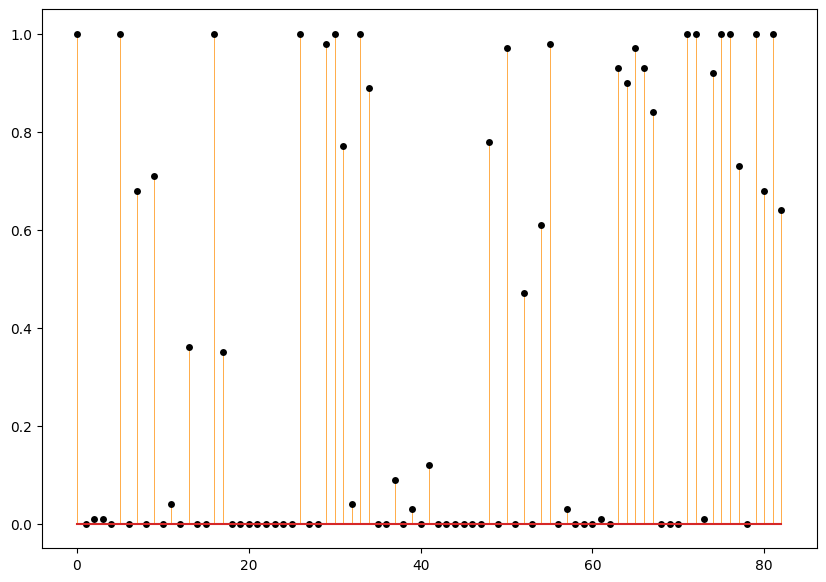

In [17]:
# Visual representation of the selection frequency (criterion 1) from the RENT
model.plot_selection_frequency()

In [18]:
# List of selected column indices
selected_feature_names = X_train_2.columns[selected_features].tolist()
selected_feature_names

['Si_wilab_f_ftir',
 'Bs_alder',
 'Bs_ph_pH2',
 'Bs_temp_end_cooled',
 'Bs_temp_Time_stage91',
 'Bs_temp_Temp_stage91',
 'Yk_mengde',
 'Yk_lopeToCoagAvgT',
 'Yk_coagToCutSumT',
 'Yk_ystevannToTommingStdT',
 'Yk_ystevannToTommingSumT',
 'Yk_tommingToendAvgT',
 'Yk_tommingToendStdT',
 'Bu_filltime',
 'Bu_emptytime',
 'Bu_tempmax',
 'Bu_tempmean',
 'Bu_start2casomaticTime',
 'Ost_wilab_ph_4t',
 'Bs_artikkel_R6024']

In [20]:
# Defining the group used in CV
groups = X_train['Bs_Batch'].values

# Initialize a scaler
scaler = StandardScaler()

# Scale X_train and X_test based on selected features
scaler.fit(X_train_2[selected_feature_names])

train_data_lr_scaled = scaler.transform(X_train_2[selected_feature_names])
test_data_lr_scaled = scaler.transform(X_test_2[selected_feature_names])

# Initialize LinearRegression and LeaveOneGroupOut
lr_model = LinearRegression()
logo = LeaveOneGroupOut()

# Use cross_val_predict to get predictions for each fold in the cross-validation
predictions_cv = cross_val_predict(lr_model, train_data_lr_scaled, Y_train, groups=groups, cv=logo)

# Calculate R² and RMSE based on cross-validation predictions
r2_cv = r2_score(Y_train, predictions_cv)
mse_cv = mean_squared_error(Y_train, predictions_cv)
rmse_cv = np.sqrt(mse_cv)

print(f"Cross-validation - Average R²: {r2_cv:.4f}")
print(f"Cross-validation - Average RMSE: {rmse_cv:.4f}")

# Train the model on the whole training set
lr_model.fit(train_data_lr_scaled, Y_train)
predictions_train = lr_model.predict(train_data_lr_scaled)

# Calculate R² and RMSE for the training set
r2_train = r2_score(Y_train, predictions_train)
mse_train = mean_squared_error(Y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"Training set - RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")

# Predict and evaluate on the test set
predictions_test = lr_model.predict(test_data_lr_scaled)

# Calculate R² and RMSE for the test set
r2_test = r2_score(Y_test, predictions_test)
mse_test = mean_squared_error(Y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

print(f"Test set - RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Cross-validation - Average R²: 0.7854
Cross-validation - Average RMSE: 0.2444
Training set - RMSE: 0.2102, R²: 0.8414
Test set - RMSE: 0.4027, R²: 0.5921


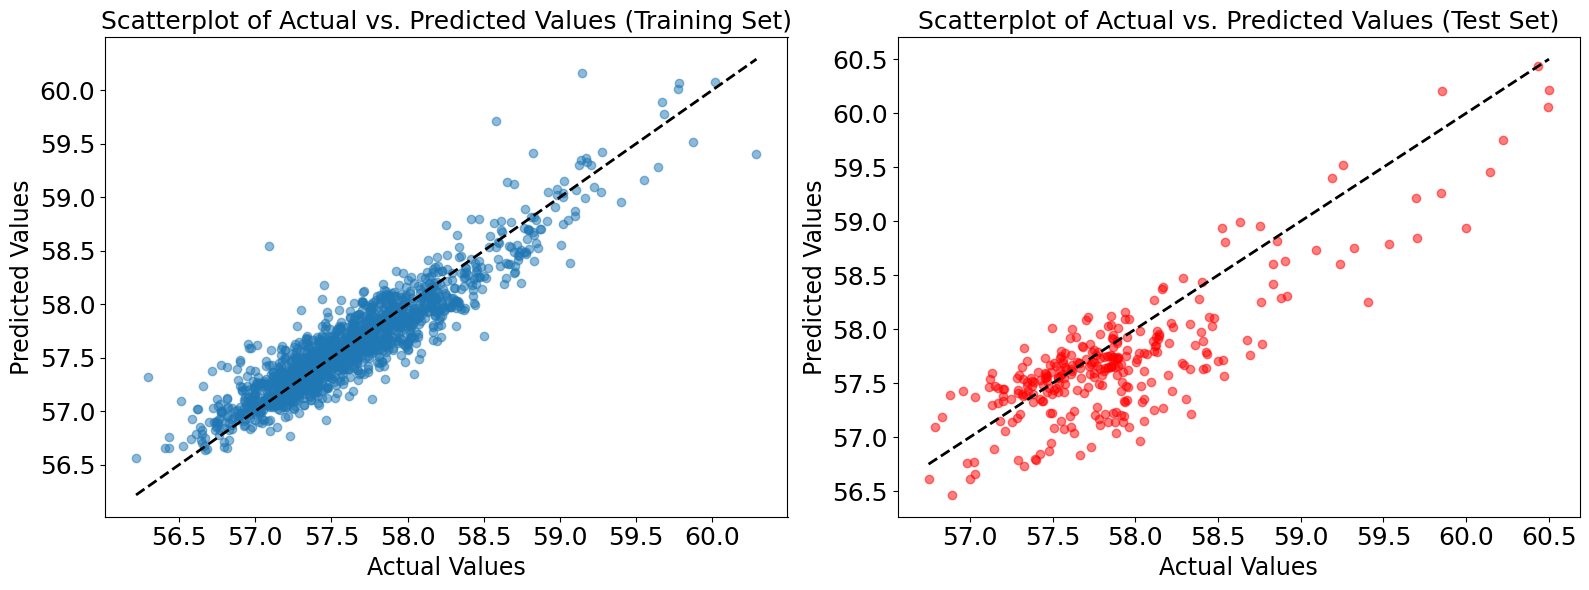

In [23]:
import matplotlib.pyplot as plt

best_model = lr_model

plt.style.use('default')

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Training Set
ax[0].scatter(Y_train, predictions_train, alpha=0.5)
ax[0].plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
ax[0].set_xlabel('Actual Values', fontsize=17)
ax[0].set_ylabel('Predicted Values', fontsize=17)
ax[0].set_title('Scatterplot of Actual vs. Predicted Values (Training Set)', fontsize=18)
ax[0].tick_params(axis='both', which='major', labelsize=18)

# Subplot 2: Test Set
ax[1].scatter(Y_test, predictions_test, alpha=0.5, color='red')
ax[1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
ax[1].set_xlabel('Actual Values', fontsize=17)
ax[1].set_ylabel('Predicted Values', fontsize=17)
ax[1].set_title('Scatterplot of Actual vs. Predicted Values (Test Set)', fontsize=18)
ax[1].tick_params(axis='both', which='major', labelsize=18)

# Display the plots side by side
plt.tight_layout()
plt.show()



mean VS1 0.27044354816802263
VS1: p-value for average score from random feature drawing:  8.109737082754654e-160
VS1: heuristic p-value (how many scores are higher than the RENT score):  0.108
With a significancelevel of  0.05  H0 is rejected.
 
-----------------------------------------------------------
 
Mean VS2 -0.9064106038775641
VS2: p-value for average score from permutation of test labels:  1.7400923537589215e-115
VS2: heuristic p-value (how many scores are higher than the RENT score):  0.0
With a significancelevel of  0.05  H0 is rejected.


<Figure size 2400x1600 with 0 Axes>

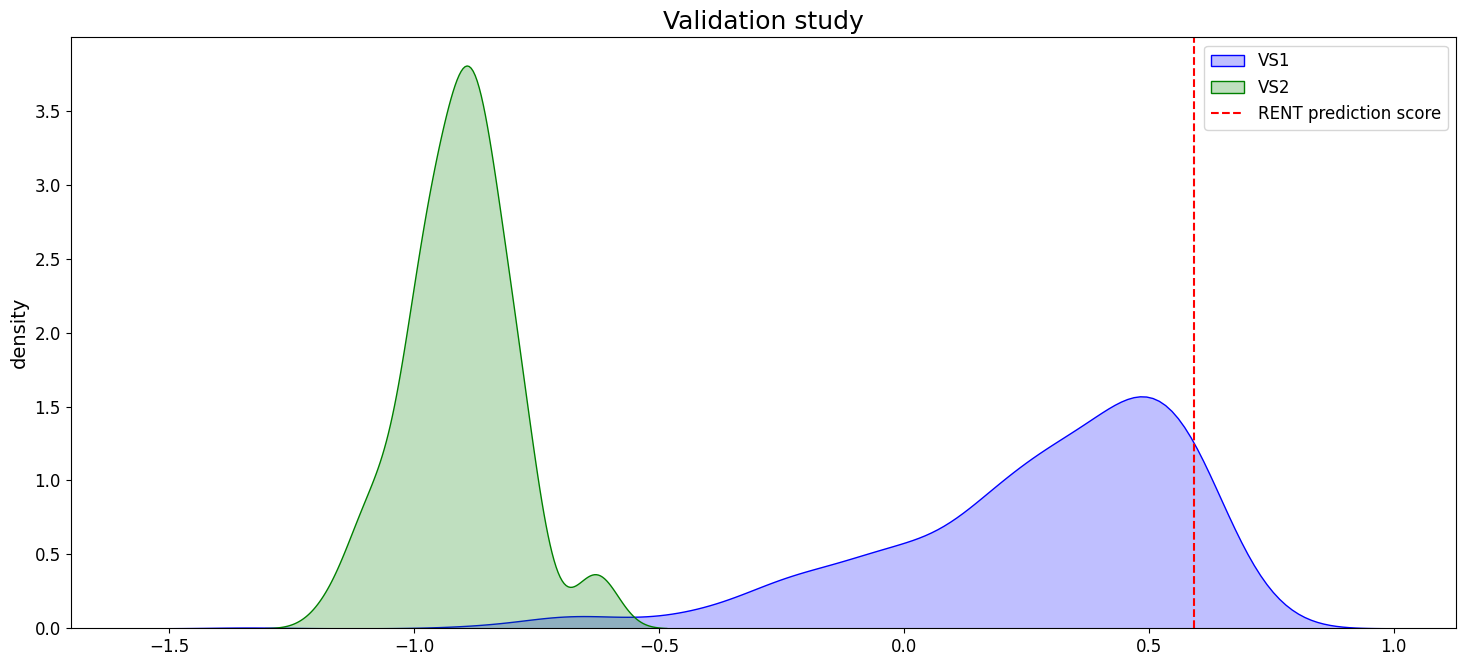

In [36]:
model.plot_validation_study(X_test_2, Y_test, num_drawings=1000, num_permutations=100, alpha=0.05)

In [ ]:
# summary object here: mean of absolut error
# Getting the mean absolute error for each object
model.get_summary_objects()

# test  mean abs error
0         44       57.044718
1         31       57.036282
2         40       56.955764
3         45       56.996153
4         37       57.155579
...      ...             ...
1454      38       57.900445
1455      39       57.446024
1456      42       57.436435
1457      42       58.165673
1458      46       58.128704

[1459 rows x 2 columns]

For each object in your dataset, it shows how often the object was part of the test set (across the K models) and the average absolute error for that object. The output is a dataframe with two columns: one showing the count of how many times each object was included in a test set (# test), and the other showing the mean absolute error (mean abs error) for that object.

In [ ]:
# With the function .get_object_errors() we receive the absolute error for each object over the
#models. If an object was not part of the test set in a model, the corresponding value is NaN.

error_data = model.get_object_errors()
error_data

mod 1      mod 2      mod 3      mod 4      mod 5      mod 6  \
1419  57.787660  57.698926  57.802892  57.847201        NaN  57.801584   
494   57.803090  57.832875  57.799228        NaN        NaN        NaN   
1411  57.567991        NaN  57.580703  57.574819        NaN        NaN   
569   57.485110        NaN        NaN        NaN        NaN        NaN   
486   57.754105  57.833381  57.780911        NaN  57.803729  57.755870   
...         ...        ...        ...        ...        ...        ...   
1340        NaN        NaN        NaN        NaN        NaN        NaN   
100         NaN        NaN        NaN        NaN        NaN        NaN   
114         NaN        NaN        NaN        NaN        NaN        NaN   
174         NaN        NaN        NaN        NaN        NaN        NaN   
910         NaN        NaN        NaN        NaN        NaN        NaN   

          mod 7      mod 8      mod 9     mod 10  ...     mod 91     mod 92  \
1419        NaN        NaN        NaN        NaN  ...        NaN  57.739176   
494         NaN        NaN        NaN        NaN  ...  57.756033        NaN   
1411        NaN        NaN        NaN        NaN  ...  57.548053  57.556122   
569         NaN  57.555939        NaN        NaN  ...  57.502023  57.496979   
486   57.772554        NaN  57.789437  57.767465  ...  57.767870  57.780919   
...         ...        ...        ...        ...  ...        ...        ...   
1340        NaN        NaN  57.524945  57.551565  ...        NaN  57.501339   
100         NaN        NaN  57.469163  57.694783  ...  57.548428  57.650412   
114         NaN        NaN  57.395840  57.378434  ...  57.407615        NaN   
174         NaN        NaN        NaN        NaN  ...  57.806005  57.734611   
910         NaN        NaN        NaN        NaN  ...        NaN        NaN   

         mod 93     mod 94     mod 95     mod 96     mod 97     mod 98  \
1419        NaN        NaN  57.785633        NaN        NaN        NaN   
494         NaN  57.821256        NaN        NaN  57.788419        NaN   
1411        NaN  57.564064  57.510407        NaN        NaN        NaN   
569         NaN        NaN        NaN        NaN        NaN  57.494546   
486         NaN  57.801726        NaN  57.806298  57.796091  57.789666   
...         ...        ...        ...        ...        ...        ...   
1340        NaN        NaN        NaN        NaN  57.547606        NaN   
100         NaN  57.162425        NaN  57.282046  57.452785        NaN   
114         NaN        NaN        NaN        NaN  57.416429  57.422562   
174   57.821643  57.721299        NaN  57.741103        NaN        NaN   
910         NaN        NaN        NaN        NaN        NaN        NaN   

         mod 99    mod 100  
1419        NaN  57.751639  
494         NaN        NaN  
1411        NaN        NaN  
569         NaN  57.518434  
486   57.788588        NaN  
...         ...        ...  
1340  57.570358  57.546342  
100   57.396558        NaN  
114         NaN        NaN  
174   57.689098        NaN  
910         NaN        NaN  

[1459 rows x 100 columns]

This method returns a matrix where each row represents an object (sample) in your dataset and each column represents generated variables. The values in this matrix are the absolute errors for the samples that were part of a test set in at least one of the K models during the RENT training process. Absolute errors are the absolute differences between predicted and actual values.

In [ ]:
np.bool = np.bool_

In [ ]:
# Reset the style to default
plt.style.use('default')
plt.figure(figsize=(24, 16))
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.autolayout'] = True
plt.rcParams.update({'font.size': 18})

<Figure size 2400x1600 with 0 Axes>

loo


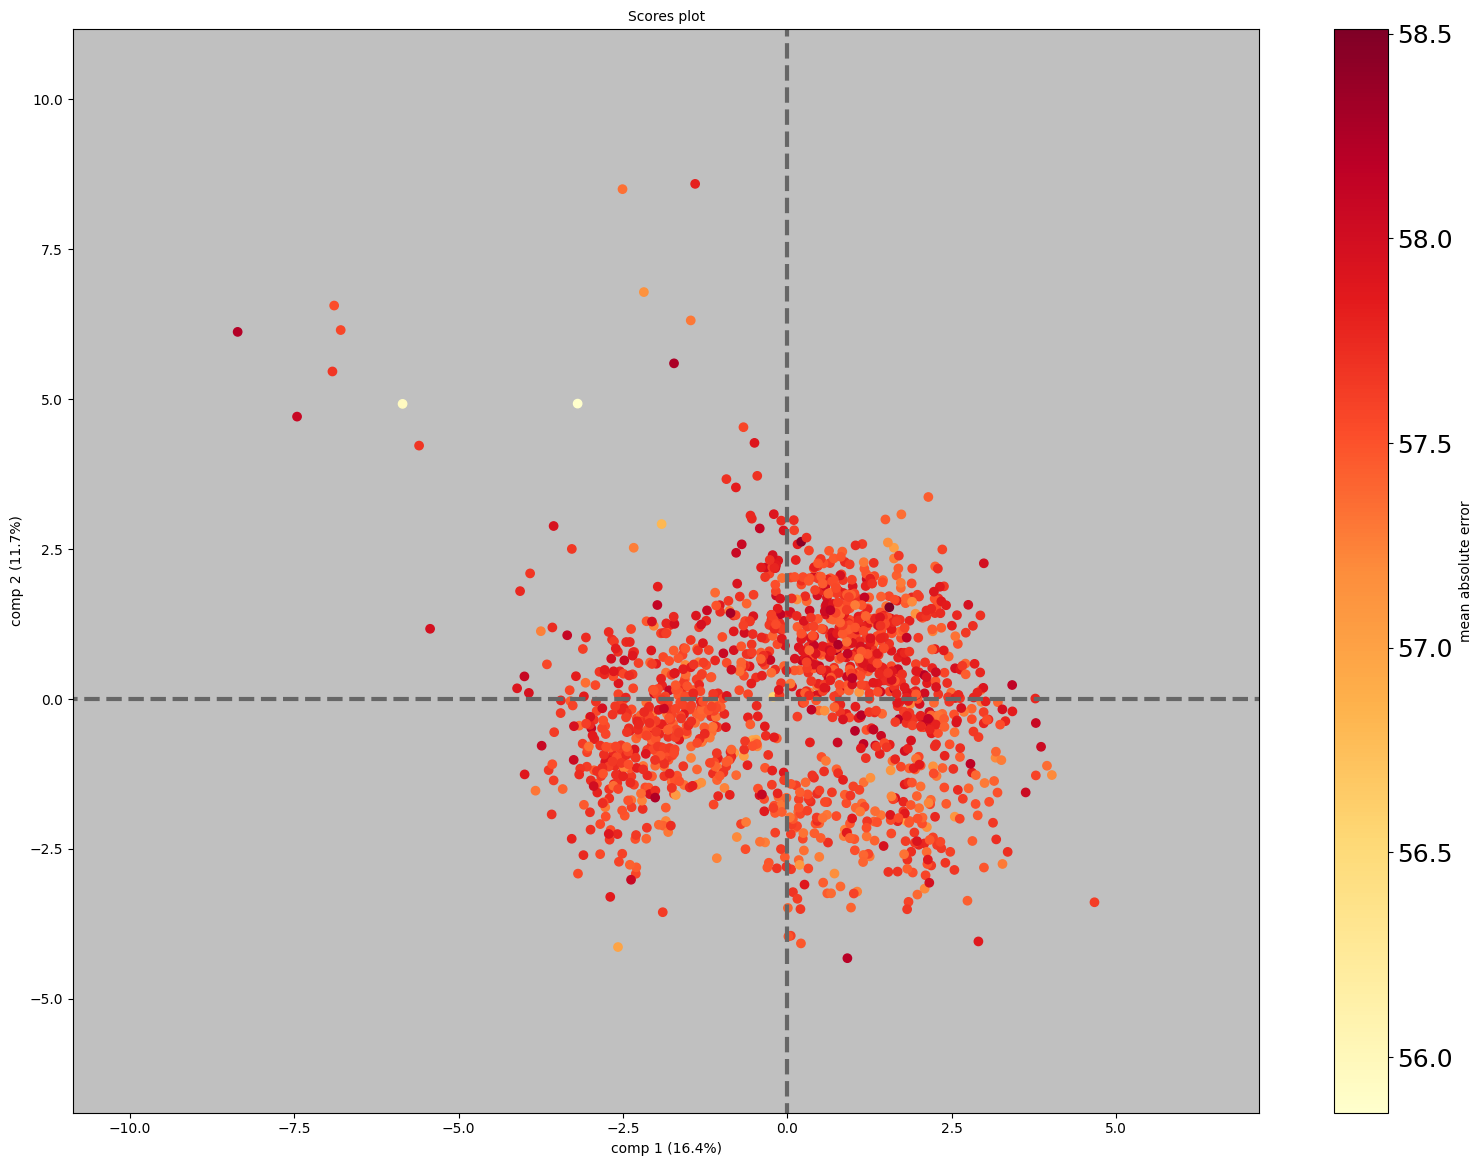

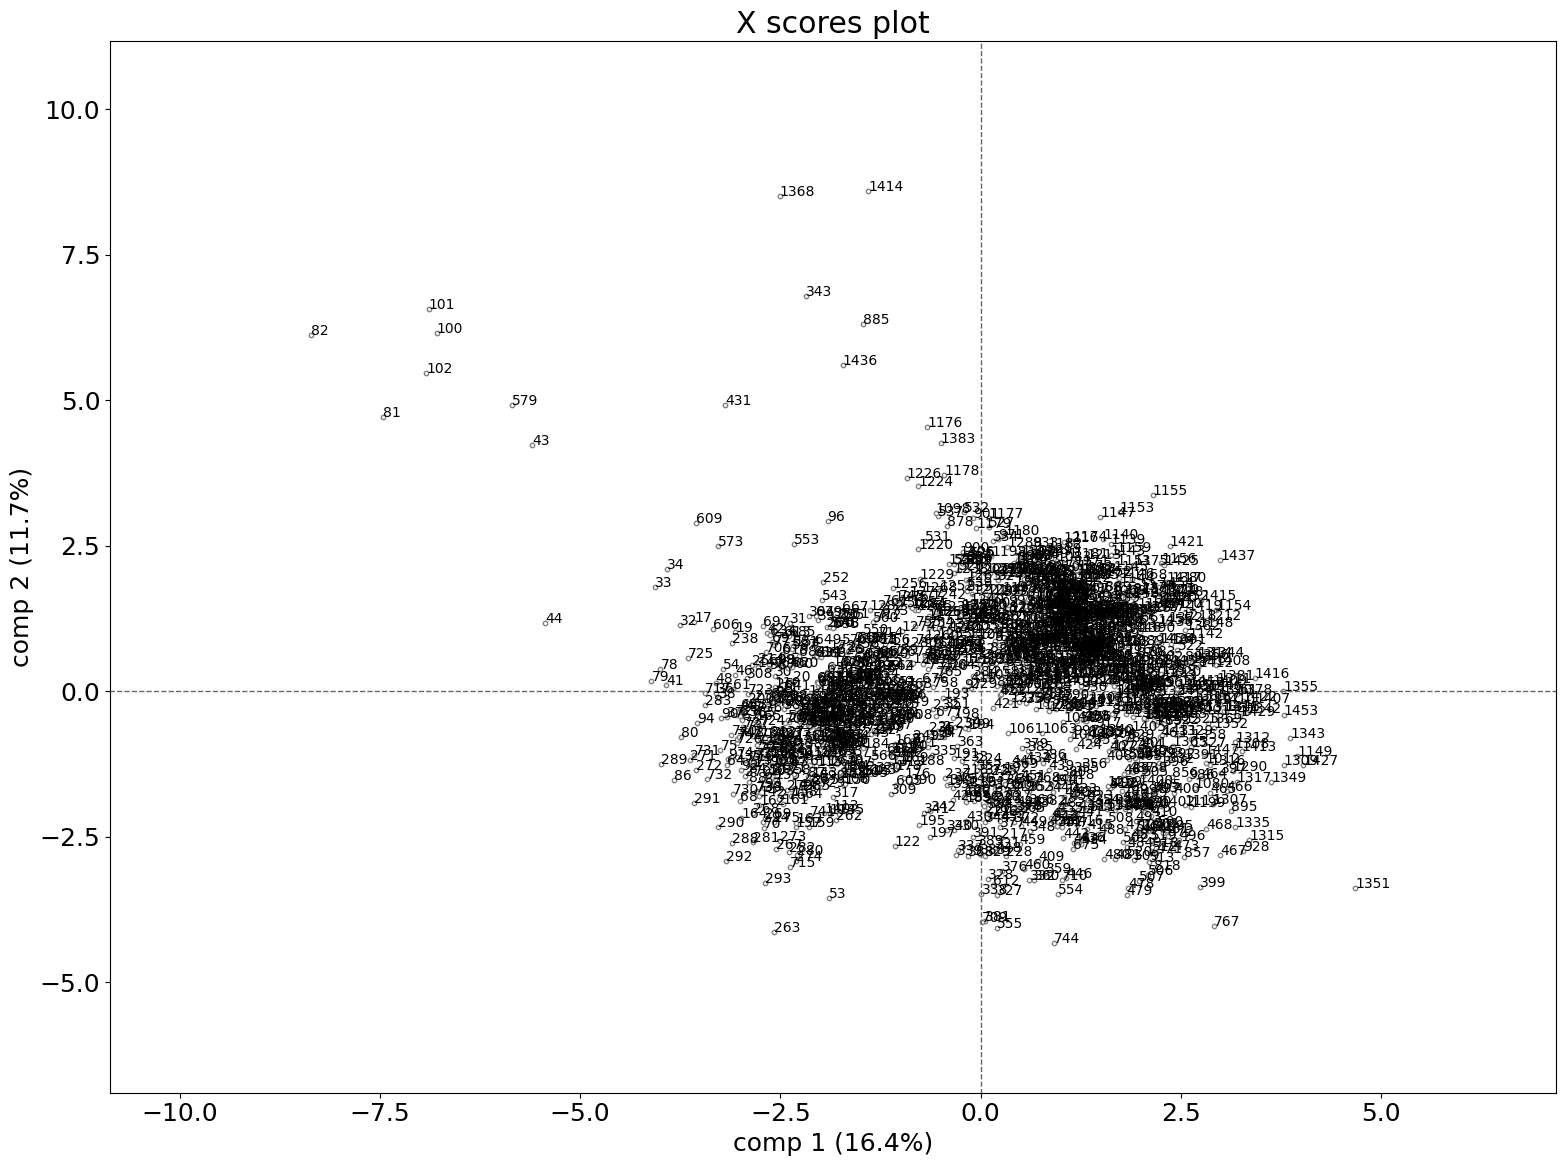

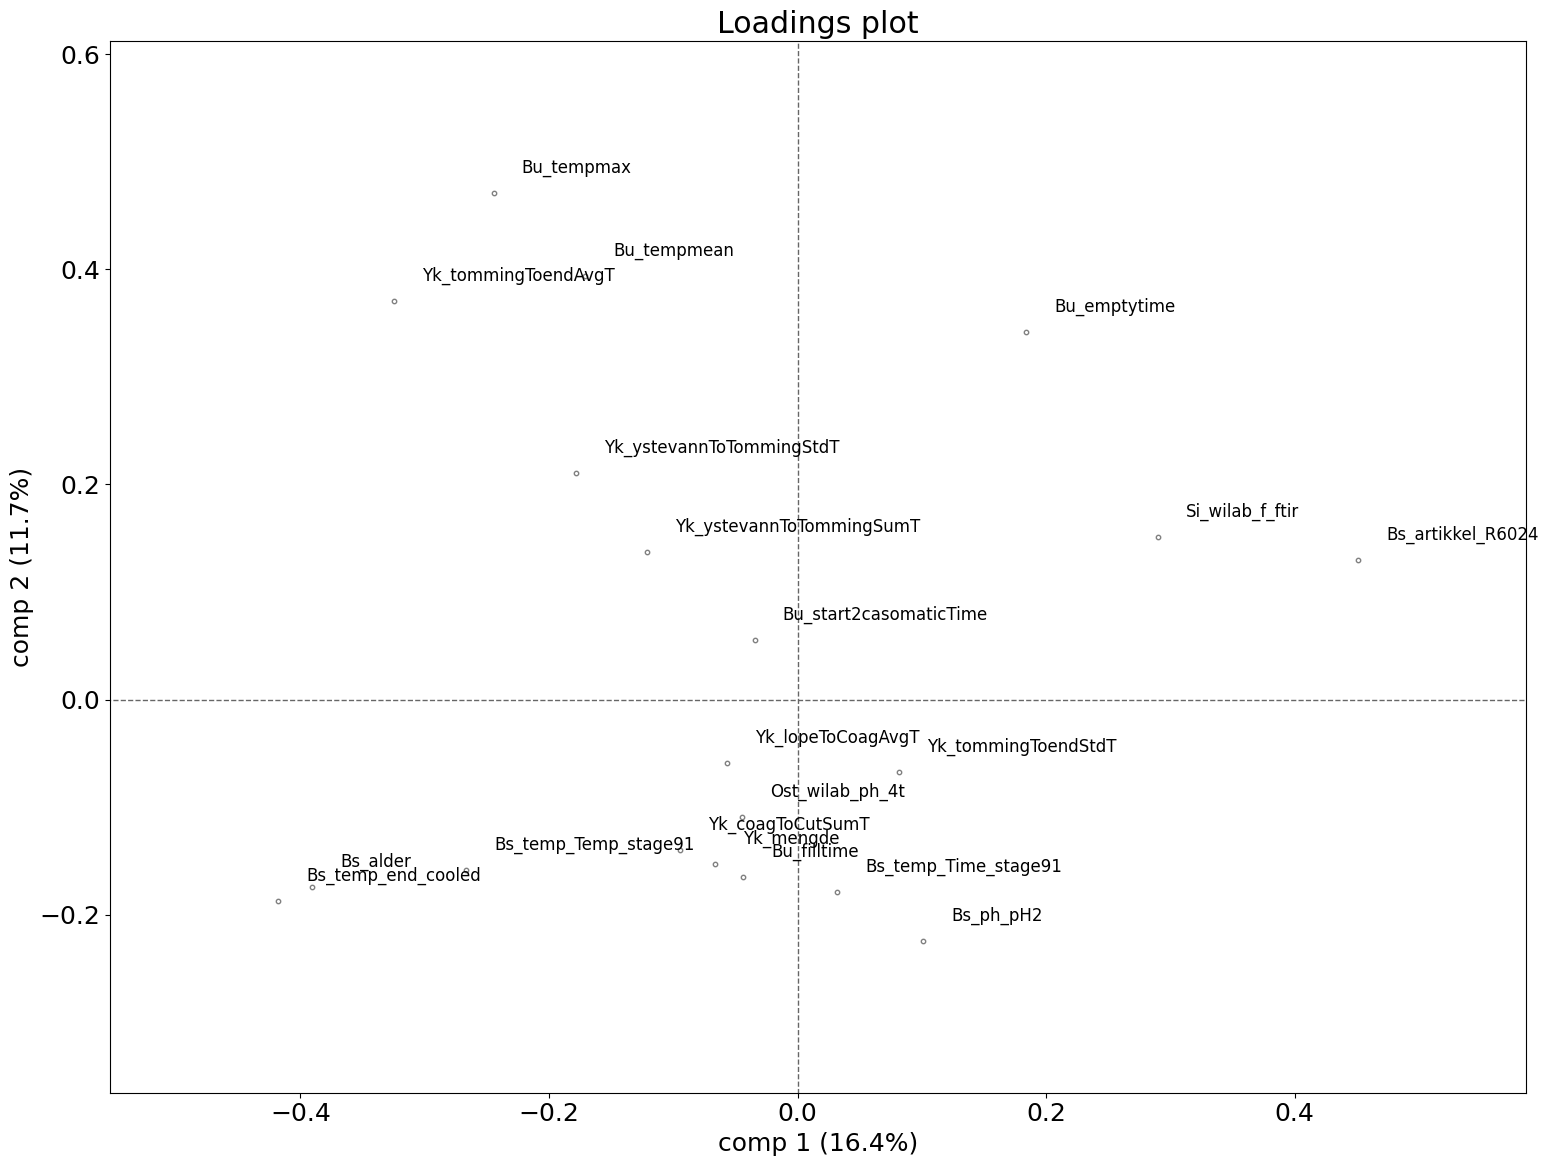

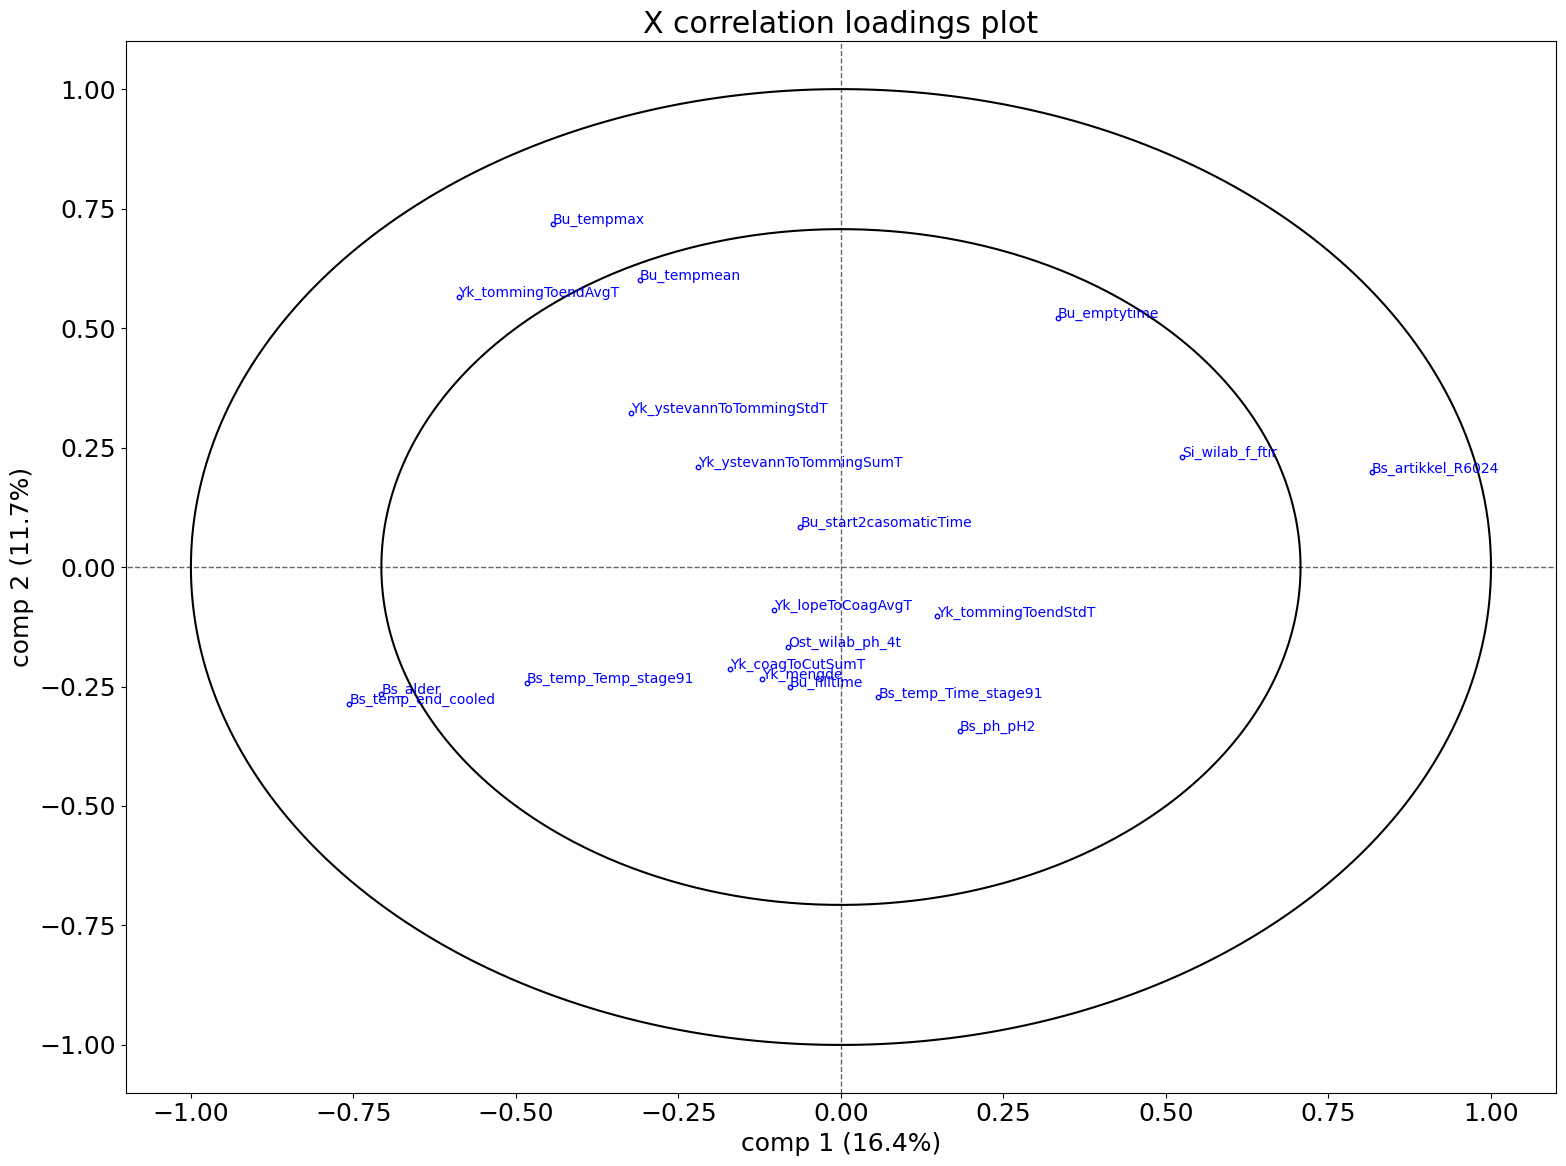

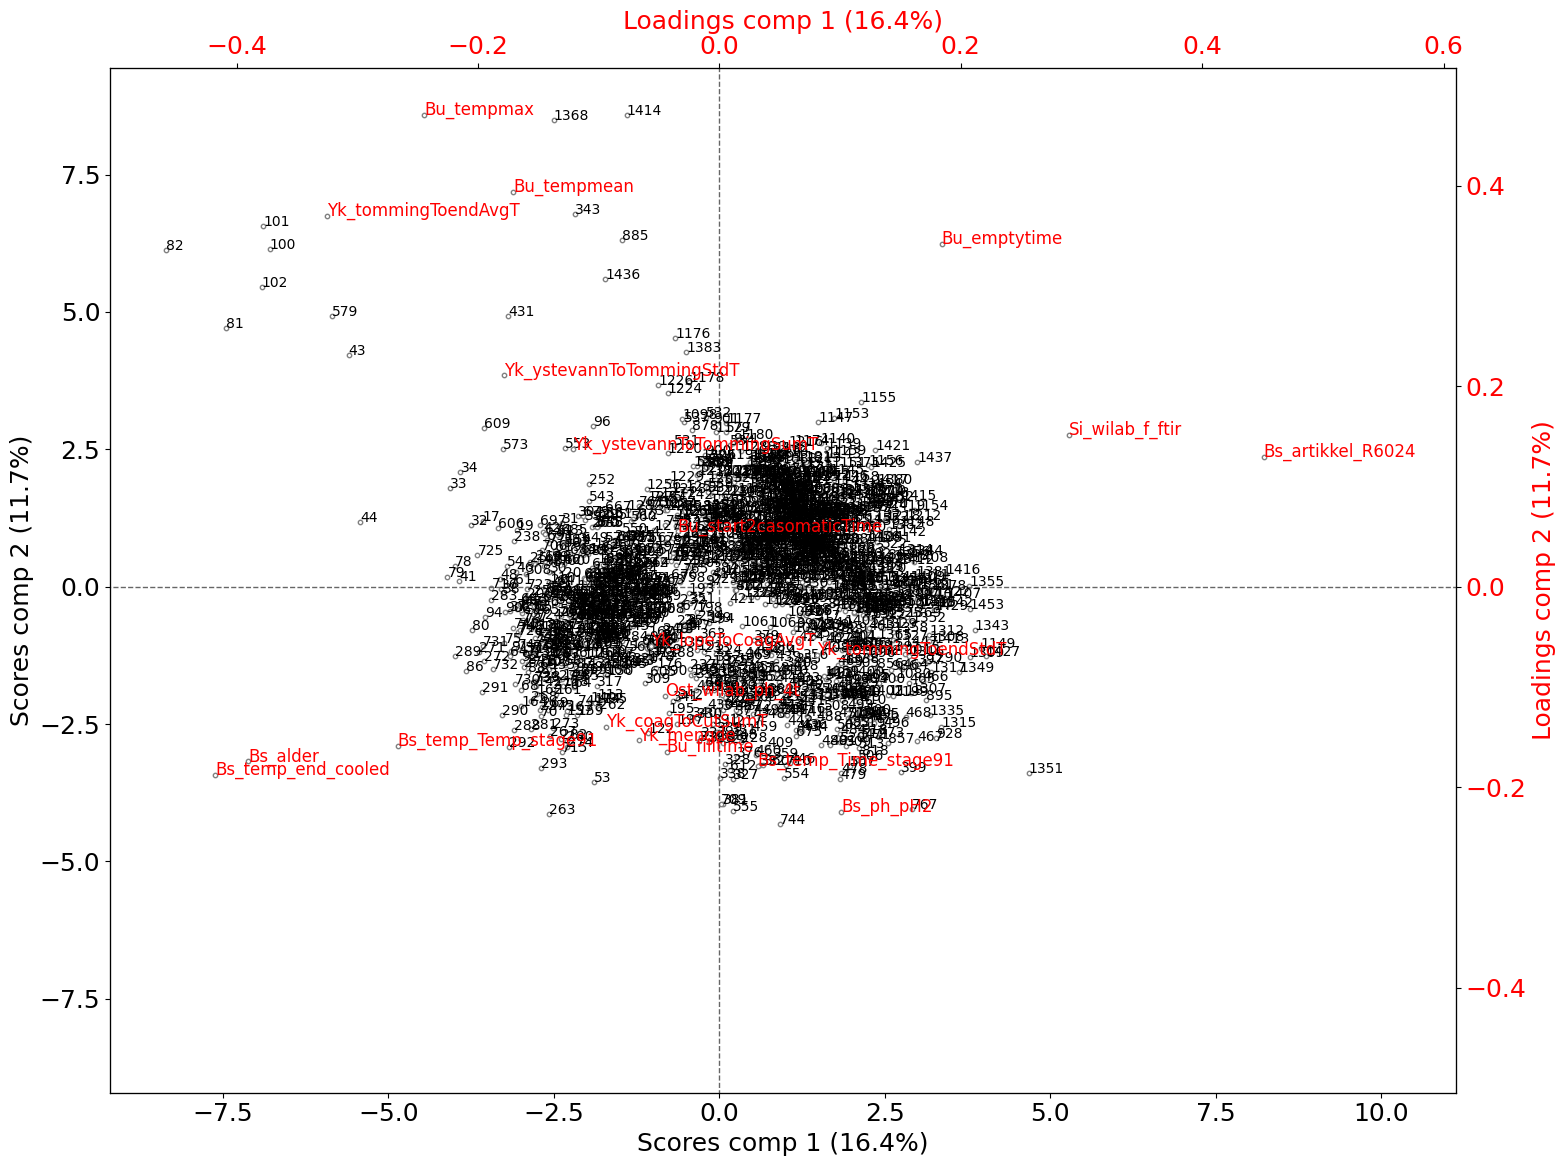

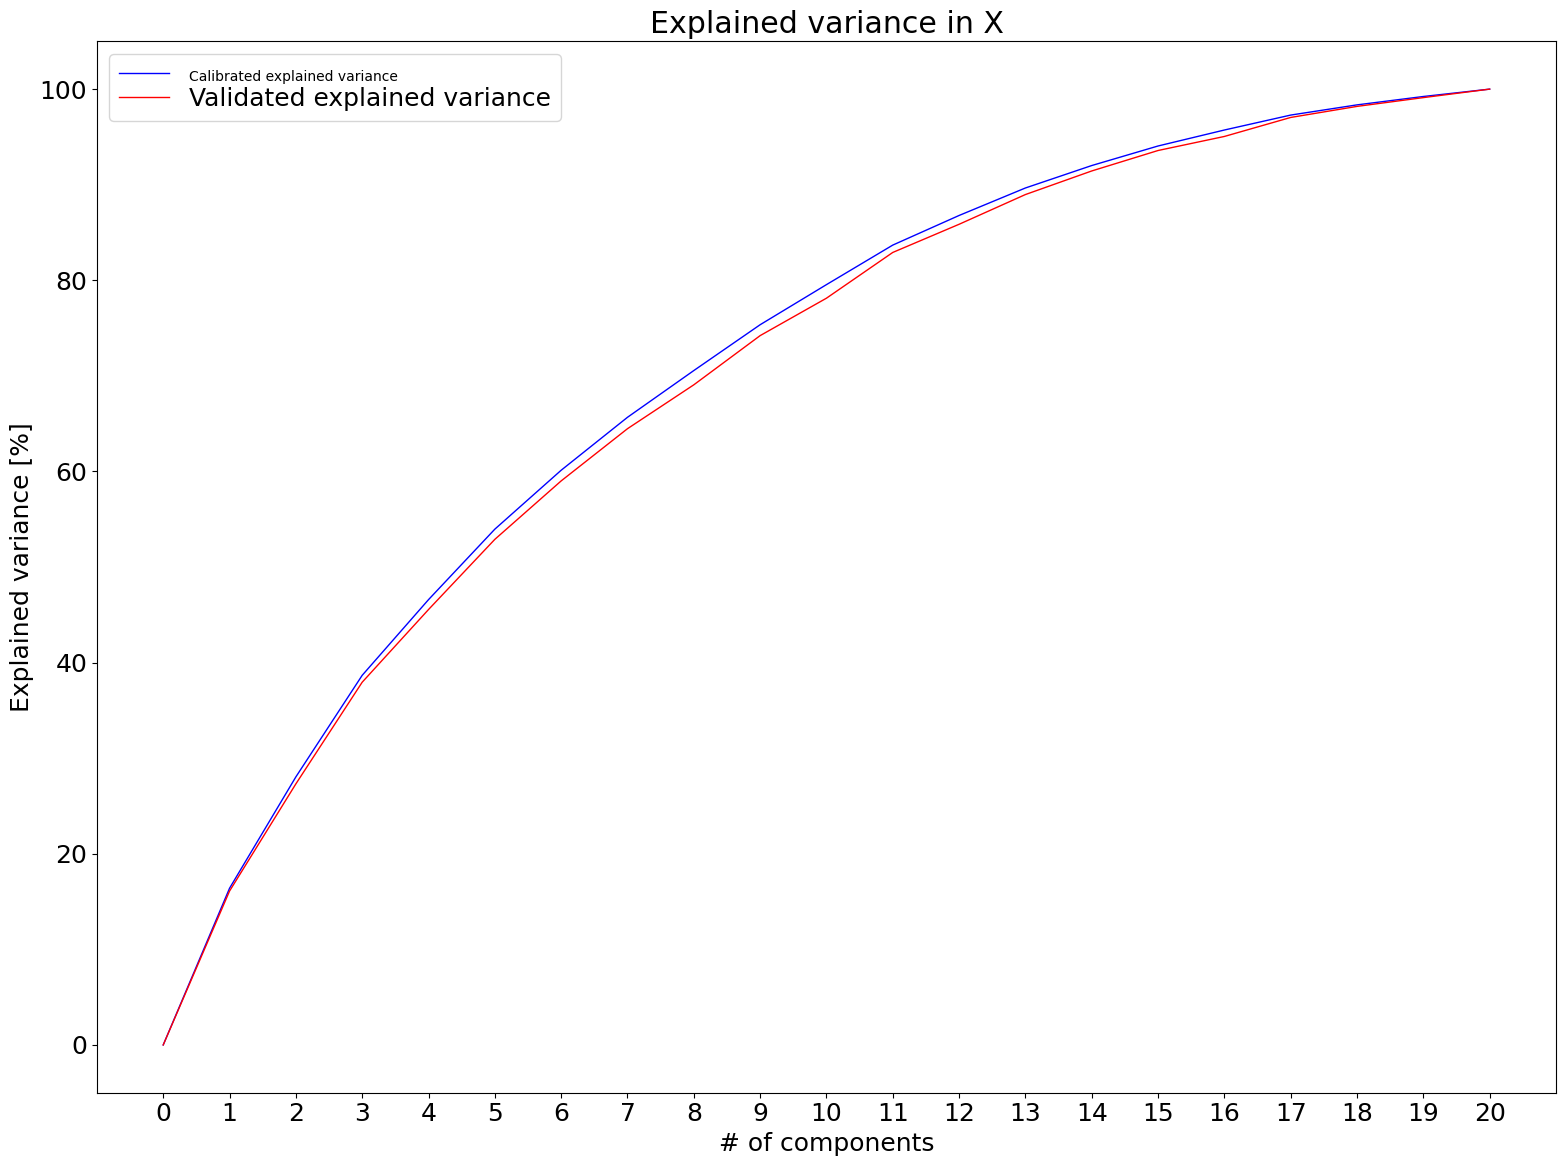

In [ ]:
# PCA for explonatory analysis using Hoggorm plots
model.plot_object_PCA(cl='continuous', problem="regression")

In [ ]:
M=10 # number of runs
alpha = 0.05 # level of significance for the confidence interval
d = len(X_train.columns) # number of features
counts = [2, 5, 10, 50, 100, 300, 500] # values to compare (K)
C, l1 = model.get_enet_params()

# Store outputs in dictionaries
times = {}
stabilities = {}
perf = {}
num_feats = {}

start = time.time()

for count in counts:
    time_count = []
    Z_net = np.zeros((M,d), dtype=np.int8)
    performance = np.zeros(M)
    numFeatures = np.zeros(M)

    for i in range(M):
        model = RENT.RENT_Regression(data=X_train,
                                target=Y_train,
                                feat_names=X_train.columns,
                                C= my_C_params,
                                l1_ratios=my_l1_ratios,
                                autoEnetParSel=True,
                                BIC=True,
                                scale=True,
                                poly='OFF',
                                testsize_range=(0.25,0.25),
                                K=count,
                                random_state=None,
                                verbose=0)
        model.train()
        features = model.select_features(0.9,0.9,0.975)
        time_count.append(model.get_runtime())

        #prediction model
        sc = StandardScaler()
        train = sc.fit_transform(X_train.values[:,features])
        test = sc.transform(X_test.values[:,features])
        ML_model =LinearRegression().fit(train, Y_train)
        performance[i] = r2_score(Y_test, ML_model.predict(test))
        Z_net[i,features] = 1
        numFeatures[i] = len(features)

    times[count] = time_count
    stabilities[count] = stability.confidenceIntervals(Z_net, alpha=alpha)
    perf[count] = performance
    num_feats[count] = numFeatures

end = time.time()

print('Runtime: ', end - start)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.6s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   12.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.3s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   13.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   14.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parall

Runtime:  1321.290233373642


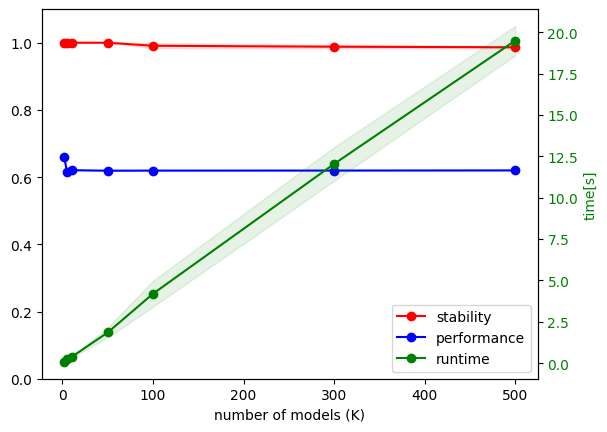

In [ ]:
def stability_plot(x_levels, stabilities, accuracies, times):
    stability = np.array(list({k: v['stability'] for k, v in stabilities.items()}.values()))
    stab_error = stability - np.array(list({k: v['lower'] for k, v in stabilities.items()}.values()))
    performance = np.array(list({k: np.mean(v) for k, v in accuracies.items()}.values()))
    performance_error = np.array(list({k: np.std(v) for k, v in accuracies.items()}.values()))
    runtime = np.array(list({k: np.mean(v) for k, v in times.items()}.values()))
    runtime_errors = np.array(list({k: np.std(v) for k, v in times.items()}.values()))

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('number of models (K)', fontsize=10)
    stab = ax1.plot(x_levels,stability, color="red", label='stability', marker='o')
    ax1.fill_between(x_levels, (stability-stab_error), (stability+stab_error),color="red", alpha=0.1 )
    perf = ax1.plot(x_levels,performance, color="blue", label='performance', marker='o')
    ax1.fill_between(x_levels, (performance-performance_error), (performance+performance_error),color="blue", alpha= 0.1 )
    plt.ylim(0,1.1)
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    ax2 = ax1.twinx()
    ax2.set_ylabel('time[s]', color='green', fontsize=10)
    tim = ax2.plot(x_levels,runtime, color="green", label='runtime', marker='o')
    ax2.fill_between(x_levels, (runtime-runtime_errors), (runtime+runtime_errors), color="green", alpha=0.1)
    ax2.tick_params(axis='y', labelcolor="green")

    leg = stab + perf + tim
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=4, fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


stability_plot(counts, stabilities, perf, times)